# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [26]:
# Import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier 
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score 

In [2]:
# Your code here

data = pd.read_csv('data_all.csv')
data.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.shape

(116322, 785)

In [4]:
data['e'].unique().sum()

1891.0

In [5]:
len(data['e'].unique())

62

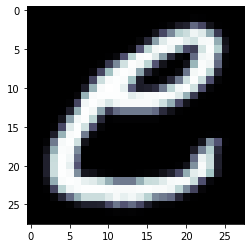

In [6]:
image = np.array(data.iloc[6,1:])
plt.imshow(image.reshape(28, 28), cmap = plt.cm.bone)

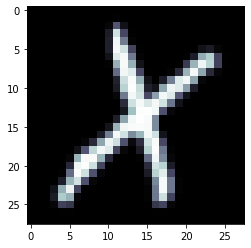

In [7]:
image = np.array(data.iloc[3,1:])
plt.imshow(image.reshape(28, 28), cmap = plt.cm.bone)

In [8]:
# Your code here

#https://isn.ucsd.edu/courses/beng260/2017/reports/2017_Group2.pdf
#Dígitos van del 0 al 9
#Mayúsculas van del 10 al 35 
#Minùsculas van del 36 en adelante 

data['number'] =  np.where(data['e'] < 10, 1, 0)
data['uppercase'] =  np.where((data['e'] < 36) & (data['e'] > 9), 1, 0)
data['lowercase'] =  np.where(data['e'] > 35, 1, 0)

data.head()

,e,1,2,3,4,5,6,7,8,9,...,778,779,780,781,782,783,784,number,uppercase,lowercase
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [37]:
# Your code here

x = data.drop(columns = ['e', 'number', 'uppercase', 'lowercase'])
y_uppercase = data['uppercase']
y_lowercase = data['lowercase']
y_number = data['number']

#Datos de entrenamiento y test 
x_train_uppercase, x_test_uppercase, y_train_uppercase, y_test_uppercase = train_test_split(x, y_uppercase, test_size = .2, random_state = 0)


In [24]:
#Logistic Regression 
logistic = LogisticRegression(solver = 'liblinear')
logistic.fit(x_train_uppercase, y_train_uppercase)
y_pred_uppercase = logistic.predict(x_test_uppercase)

#Evaluate the model 
accuracy = accuracy_score(y_test_uppercase, y_pred_uppercase)
f1 = cross_val_score(logistic, x , y_uppercase, scoring='f1_weighted',cv=3)
confusion = confusion_matrix(y_test_uppercase, y_pred_uppercase)
recall = recall_score(y_test_uppercase, y_pred_uppercase)

#Print the metrics for the model 
print(f'The accuracy score of the model is: {accuracy}')
print(f'The F1 of the model is: {f1.mean()}')
print(f'The confusion matrix of the model is: {confusion}')
print(f'The recall score of the model is: {recall}')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The accuracy score of the model is: 0.7487212551042338
The F1 of the model is: 0.7082596353053138
The confusion matrix of the model is: [[15947  1090]
 [ 4756  1472]]
The recall score of the model is: 0.2363519588953115


In [28]:
#SVM Classifier 
svm = OneVsOneClassifier(LinearSVC(random_state = 0, max_iter = 4000))
svm.fit(x_train_uppercase, y_train_uppercase)
y_pred_uppercase = svm.predict(x_test_uppercase)

#Evaluate the model 
accuracy = accuracy_score(y_test_uppercase, y_pred_uppercase)
f1 = cross_val_score(logistic, x , y_uppercase, scoring='f1_weighted',cv=3)
confusion = confusion_matrix(y_test_uppercase, y_pred_uppercase)
recall = recall_score(y_test_uppercase, y_pred_uppercase)

#Print the metrics for the model 
print(f'The accuracy score of the model is: {accuracy}')
print(f'The F1 of the model is: {f1.mean()}')
print(f'The confusion matrix of the model is: {confusion}')
print(f'The recall score of the model is: {recall}')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The accuracy score of the model is: 0.6959381044487427
The F1 of the model is: 0.7082596353053138
The confusion matrix of the model is: [[14741  2296]
 [ 4778  1450]]
The recall score of the model is: 0.23281952472703918


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [29]:
#Decision Tree 
params = {'random_state': 0, 'max_depth': 4}
tree = DecisionTreeClassifier(**params)
tree.fit(x_train_uppercase, y_train_uppercase)
y_pred_uppercase = tree.predict(x_test_uppercase)

#Evaluate the model 
accuracy = accuracy_score(y_test_uppercase, y_pred_uppercase)
f1 = cross_val_score(logistic, x , y_uppercase, scoring='f1_weighted',cv=3)
confusion = confusion_matrix(y_test_uppercase, y_pred_uppercase)
recall = recall_score(y_test_uppercase, y_pred_uppercase)

#Print the metrics for the model 
print(f'The accuracy score of the model is: {accuracy}')
print(f'The F1 of the model is: {f1.mean()}')
print(f'The confusion matrix of the model is: {confusion}')
print(f'The recall score of the model is: {recall}')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The accuracy score of the model is: 0.7496238985600687
The F1 of the model is: 0.7082596353053138
The confusion matrix of the model is: [[16698   339]
 [ 5486   742]]
The recall score of the model is: 0.1191393705844573


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [31]:
#KNeighbors 
num_neighbors = 12
kneigh = KNeighborsClassifier(num_neighbors, weights = 'distance')
kneigh.fit(x_train_uppercase, y_train_uppercase)
y_pred_uppercase = kneigh.predict(x_test_uppercase)

#Evaluate the model 
accuracy = accuracy_score(y_test_uppercase, y_pred_uppercase)
f1 = cross_val_score(logistic, x , y_uppercase, scoring='f1_weighted',cv=3)
confusion = confusion_matrix(y_test_uppercase, y_pred_uppercase)
recall = recall_score(y_test_uppercase, y_pred_uppercase)

#Print the metrics for the model 
print(f'The accuracy score of the model is: {accuracy}')
print(f'The F1 of the model is: {f1.mean()}')
print(f'The confusion matrix of the model is: {confusion}')
print(f'The recall score of the model is: {recall}')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The accuracy score of the model is: 0.8612078229099506
The F1 of the model is: 0.7082596353053138
The confusion matrix of the model is: [[15766  1271]
 [ 1958  4270]]
The recall score of the model is: 0.6856133590237636


* Try to do the same thing with lowercases.

In [32]:
# Your code here

#Datos de entrenamiento y test 
x_train_lowercase, x_test_lowercase, y_train_lowercase, y_test_lowercase = train_test_split(x, y_lowercase, test_size = .2, random_state = 0)


In [33]:
#Logistic Regression 
logistic = LogisticRegression(solver = 'liblinear')
logistic.fit(x_train_lowercase, y_train_lowercase)
y_pred_lowercase = logistic.predict(x_test_lowercase)

#Evaluate the model 
accuracy = accuracy_score(y_test_lowercase, y_pred_lowercase)
f1 = cross_val_score(logistic, x , y_lowercase, scoring='f1_weighted',cv=3)
confusion = confusion_matrix(y_test_lowercase, y_pred_lowercase)
recall = recall_score(y_test_lowercase, y_pred_lowercase)

#Print the metrics for the model 
print(f'The accuracy score of the model is: {accuracy}')
print(f'The F1 of the model is: {f1.mean()}')
print(f'The confusion matrix of the model is: {confusion}')
print(f'The recall score of the model is: {recall}')

The accuracy score of the model is: 0.8100580270793036
The F1 of the model is: 0.7900691011203286
The confusion matrix of the model is: [[16873   972]
 [ 3447  1973]]
The recall score of the model is: 0.3640221402214022


In [34]:
#SVM Classifier 
svm = OneVsOneClassifier(LinearSVC(random_state = 0, max_iter = 4000))
svm.fit(x_train_lowercase, y_train_lowercase)
y_pred_lowercase = svm.predict(x_test_lowercase)

#Evaluate the model 
accuracy = accuracy_score(y_test_lowercase, y_pred_lowercase)
f1 = cross_val_score(logistic, x , y_lowercase, scoring='f1_weighted',cv=3)
confusion = confusion_matrix(y_test_lowercase, y_pred_lowercase)
recall = recall_score(y_test_lowercase, y_pred_lowercase)

#Print the metrics for the model 
print(f'The accuracy score of the model is: {accuracy}')
print(f'The F1 of the model is: {f1.mean()}')
print(f'The confusion matrix of the model is: {confusion}')
print(f'The recall score of the model is: {recall}')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The accuracy score of the model is: 0.7028153879217709
The F1 of the model is: 0.7900691011203286
The confusion matrix of the model is: [[13569  4276]
 [ 2638  2782]]
The recall score of the model is: 0.5132841328413285


In [35]:
#Decision Tree 
params = {'random_state': 0, 'max_depth': 4}
tree = DecisionTreeClassifier(**params)
tree.fit(x_train_lowercase, y_train_lowercase)
y_pred_lowercase = tree.predict(x_test_lowercase)

#Evaluate the model 
accuracy = accuracy_score(y_test_lowercase, y_pred_lowercase)
f1 = cross_val_score(logistic, x , y_lowercase, scoring='f1_weighted',cv=3)
confusion = confusion_matrix(y_test_lowercase, y_pred_lowercase)
recall = recall_score(y_test_lowercase, y_pred_lowercase)

#Print the metrics for the model 
print(f'The accuracy score of the model is: {accuracy}')
print(f'The F1 of the model is: {f1.mean()}')
print(f'The confusion matrix of the model is: {confusion}')
print(f'The recall score of the model is: {recall}')

The accuracy score of the model is: 0.7688802922845476
The F1 of the model is: 0.7900691011203286
The confusion matrix of the model is: [[16872   973]
 [ 4404  1016]]
The recall score of the model is: 0.18745387453874537


In [36]:
#KNeighbors 
num_neighbors = 12
kneigh = KNeighborsClassifier(num_neighbors, weights = 'distance')
kneigh.fit(x_train_lowercase, y_train_lowercase)
y_pred_lowercase = kneigh.predict(x_test_lowercase)

#Evaluate the model 
accuracy = accuracy_score(y_test_lowercase, y_pred_lowercase)
f1 = cross_val_score(logistic, x , y_lowercase, scoring='f1_weighted',cv=3)
confusion = confusion_matrix(y_test_lowercase, y_pred_lowercase)
recall = recall_score(y_test_lowercase, y_pred_lowercase)

#Print the metrics for the model 
print(f'The accuracy score of the model is: {accuracy}')
print(f'The F1 of the model is: {f1.mean()}')
print(f'The confusion matrix of the model is: {confusion}')
print(f'The recall score of the model is: {recall}')

The accuracy score of the model is: 0.8848914678701912
The F1 of the model is: 0.7900691011203286
The confusion matrix of the model is: [[17127   718]
 [ 1960  3460]]
The recall score of the model is: 0.6383763837638377


* Try to do the same thing with numbers.

In [38]:
#Datos de entrenamiento y test 
x_train_number, x_test_number, y_train_number, y_test_number = train_test_split(x, y_number, test_size = .2, random_state = 0)


In [39]:
# Your code here

#Logistic Regression 
logistic = LogisticRegression(solver = 'liblinear')
logistic.fit(x_train_number, y_train_number)
y_pred_number = logistic.predict(x_test_number)

#Evaluate the model 
accuracy = accuracy_score(y_test_number, y_pred_number)
f1 = cross_val_score(logistic, x , y_number, scoring='f1_weighted',cv=3)
confusion = confusion_matrix(y_test_number, y_pred_number)
recall = recall_score(y_test_number, y_pred_number)

#Print the metrics for the model 
print(f'The accuracy score of the model is: {accuracy}')
print(f'The F1 of the model is: {f1.mean()}')
print(f'The confusion matrix of the model is: {confusion}')
print(f'The recall score of the model is: {recall}')

The accuracy score of the model is: 0.7334622823984526
The F1 of the model is: 0.734498366872777
The confusion matrix of the model is: [[8283 3365]
 [2836 8781]]
The recall score of the model is: 0.755875010760093


In [40]:
#SVM Classifier 
svm = OneVsOneClassifier(LinearSVC(random_state = 0, max_iter = 4000))
svm.fit(x_train_number, y_train_number)
y_pred_number = svm.predict(x_test_number)

#Evaluate the model 
accuracy = accuracy_score(y_test_number, y_pred_number)
f1 = cross_val_score(logistic, x , y_number, scoring='f1_weighted',cv=3)
confusion = confusion_matrix(y_test_number, y_pred_number)
recall = recall_score(y_test_number, y_pred_number)

#Print the metrics for the model 
print(f'The accuracy score of the model is: {accuracy}')
print(f'The F1 of the model is: {f1.mean()}')
print(f'The confusion matrix of the model is: {confusion}')
print(f'The recall score of the model is: {recall}')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The accuracy score of the model is: 0.5745110681280894
The F1 of the model is: 0.734498366872777
The confusion matrix of the model is: [[10140  1508]
 [ 8391  3226]]
The recall score of the model is: 0.2776964792975811


In [41]:
#Decision Tree 
params = {'random_state': 0, 'max_depth': 4}
tree = DecisionTreeClassifier(**params)
tree.fit(x_train_number, y_train_number)
y_pred_number = tree.predict(x_test_number)

#Evaluate the model 
accuracy = accuracy_score(y_test_number, y_pred_number)
f1 = cross_val_score(logistic, x , y_number, scoring='f1_weighted',cv=3)
confusion = confusion_matrix(y_test_number, y_pred_number)
recall = recall_score(y_test_number, y_pred_number)

#Print the metrics for the model 
print(f'The accuracy score of the model is: {accuracy}')
print(f'The F1 of the model is: {f1.mean()}')
print(f'The confusion matrix of the model is: {confusion}')
print(f'The recall score of the model is: {recall}')

The accuracy score of the model is: 0.6952933591231464
The F1 of the model is: 0.734498366872777
The confusion matrix of the model is: [[8860 2788]
 [4301 7316]]
The recall score of the model is: 0.6297667211844711


In [42]:
#KNeighbors 
num_neighbors = 12
kneigh = KNeighborsClassifier(num_neighbors, weights = 'distance')
kneigh.fit(x_train_number, y_train_number)
y_pred_number = kneigh.predict(x_test_number)

#Evaluate the model 
accuracy = accuracy_score(y_test_number, y_pred_number)
f1 = cross_val_score(logistic, x , y_number, scoring='f1_weighted',cv=3)
confusion = confusion_matrix(y_test_number, y_pred_number)
recall = recall_score(y_test_number, y_pred_number)

#Print the metrics for the model 
print(f'The accuracy score of the model is: {accuracy}')
print(f'The F1 of the model is: {f1.mean()}')
print(f'The confusion matrix of the model is: {confusion}')
print(f'The recall score of the model is: {recall}')

The accuracy score of the model is: 0.880421233612723
The F1 of the model is: 0.734498366872777
The confusion matrix of the model is: [[ 9917  1731]
 [ 1051 10566]]
The recall score of the model is: 0.9095291383317552
